# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [37]:

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [38]:
mouse_counts = combined_data_df['Mouse ID'].value_counts()
num_unique_mice = len(mouse_counts)
print("Number of unique mice:", num_unique_mice)

Number of unique mice: 249


In [41]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_rows['Mouse ID'].unique()
duplicate_mice_ids


array(['g989'], dtype=object)

In [42]:
# Optional: Get all the data for the duplicate mouse ID. 
##HELP
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [43]:
cleaned_data = combined_data_df.loc[combined_data_df["Mouse ID"]!="g989"]
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [44]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print("Number of mice in the clean DataFrame:", num_mice_cleaned)

Number of mice in the clean DataFrame: 248


## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tumor = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tumor = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                           "Median Tumor Volume": median_tumor,
                           "Tumor Volume Variance": var_tumor,
                           "Tumor Volume Std. Dev.": std_tumor,
                           "Tumor Volume Std. Err.": sem_tumor})

# Assemble the resulting series into a single summary DataFrame.
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Group by 'Drug Regimen' and calculate mean, median, variance, standard deviation, and SEM of the tumor volume
summary_stats = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for clarity
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std. Deviation', 'SEM']

# Display the summary statistics DataFrame
summary_stats


,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

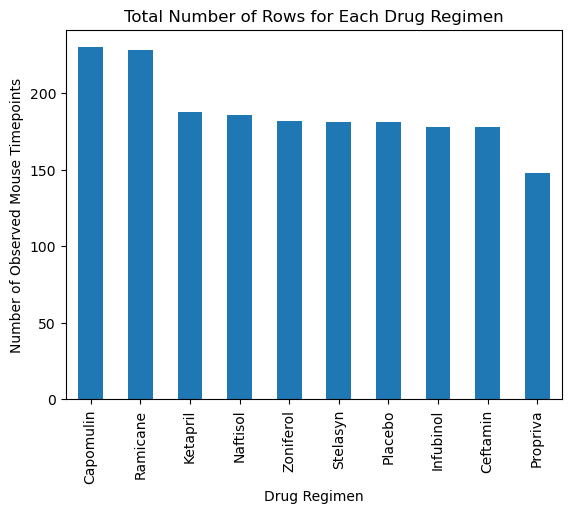

In [51]:
# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
drug_counts = cleaned_data['Drug Regimen'].value_counts()

# Plot the bar plot
drug_counts.plot(kind='bar')

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

# Show the plot
plt.show()

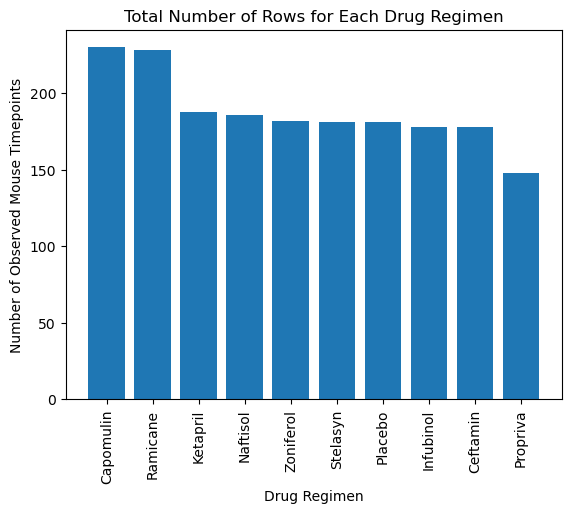

In [53]:
plt.bar(x=drug_counts.index, height=drug_counts.values)
plt.xticks(rotation=90)

plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

plt.show()

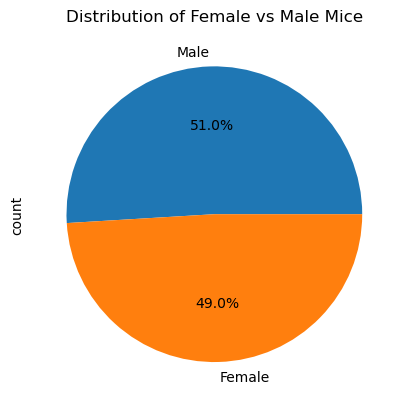

In [54]:
# Plot the pie plot showing the distribution of female versus male mice
gender = cleaned_data['Sex'].value_counts()
gender.plot(kind='pie', autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()

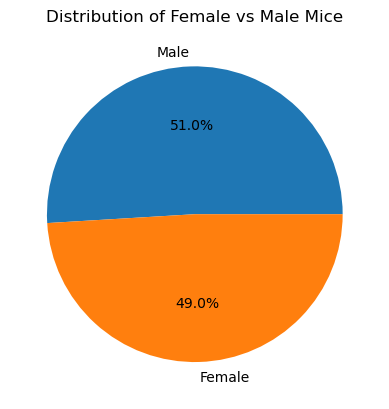

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(x=gender.values, labels=gender.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_idx = cleaned_data.groupby('Mouse ID')[['Timepoint']].max().reset_index()
last_timepoint_idx

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_idx, cleaned_data, how='left', on=['Mouse ID', 'Timepoint'])
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumors = merged_df.loc[merged_df['Drug Regimen']==treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(tumors)
    
    # Determine outliers using upper and lower bounds
    q1 = tumors.quantile(0.25)
    q3 = tumors.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = tumors.loc[(tumors < fence_low) | (tumors > fence_high)]
    print(treatment,df_out)



Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


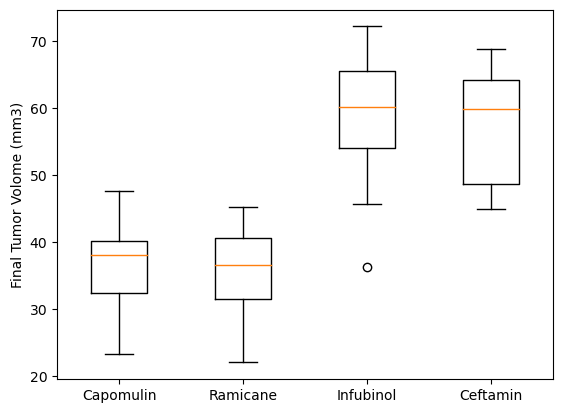

In [80]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatments)
plt.ylabel('Final Tumor Volome (mm3)')
plt.show()

## Line and Scatter Plots

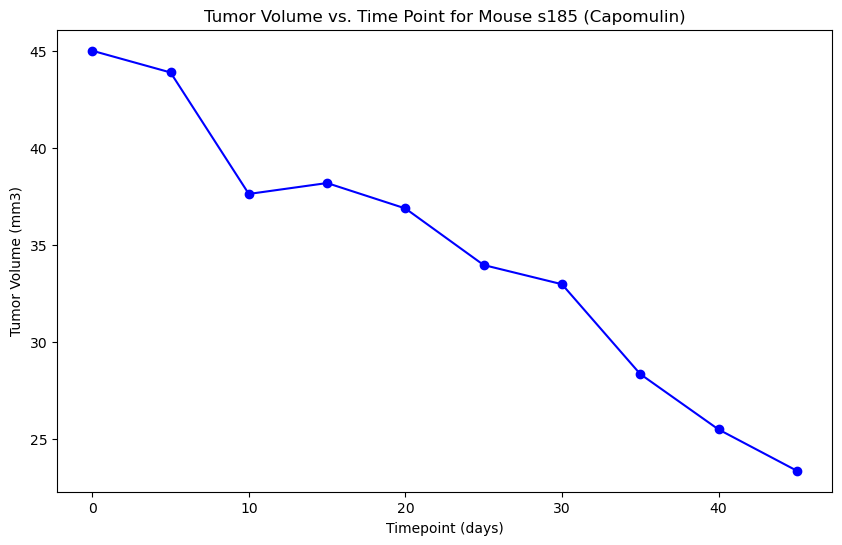

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 's185'
drug_regimen = 'Capomulin'
mouse_data = cleaned_data[(cleaned_data['Mouse ID'] == mouse_id) & (cleaned_data['Drug Regimen'] == drug_regimen)]


plt.figure(figsize=(10, 6))  
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='-')

# Add title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

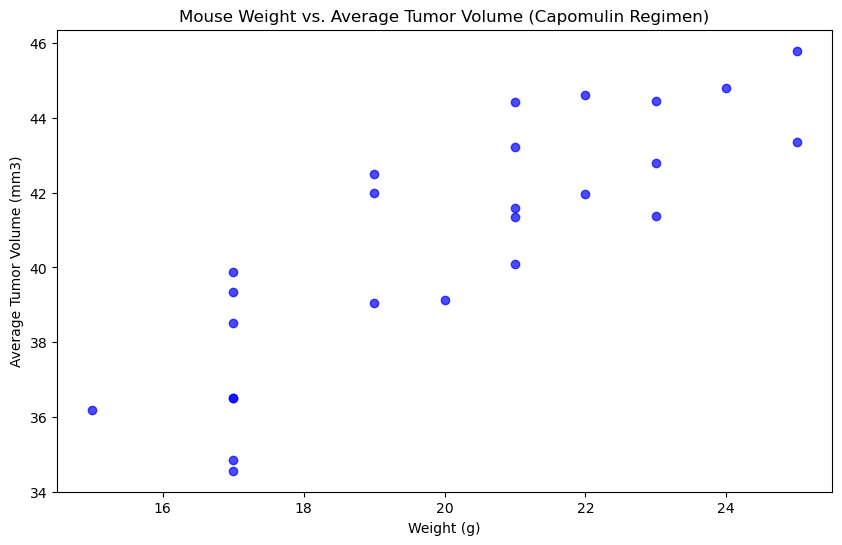

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse weight data
merged_data_scatter = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID')


plt.figure(figsize=(10, 6))  
plt.scatter(merged_data_scatter['Weight (g)'], merged_data_scatter['Tumor Volume (mm3)'], color='blue', alpha=0.7)

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694722


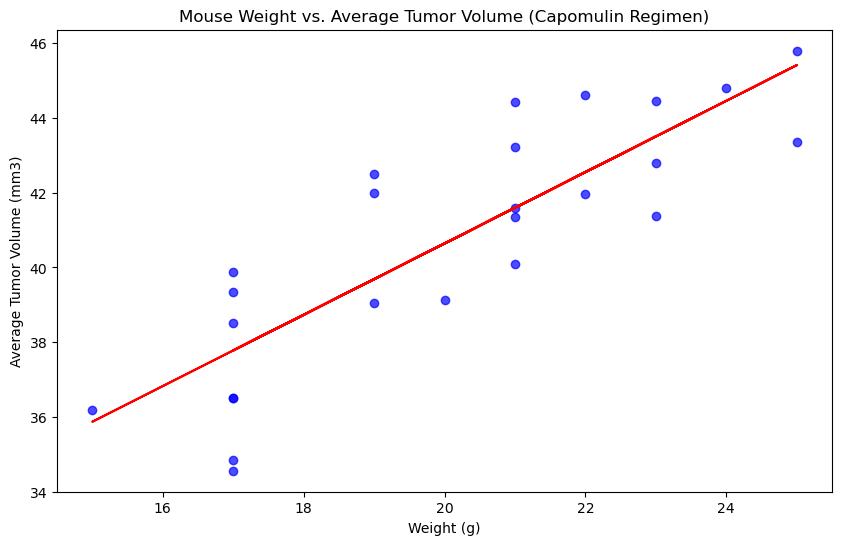

In [78]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = merged_data_scatter['Weight (g)'].corr(merged_data_scatter['Tumor Volume (mm3)'])
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression
slope, intercept, _, _, _ = st.linregress(merged_data_scatter['Weight (g)'], merged_data_scatter['Tumor Volume (mm3)'])

# Create the regression line
regress_values = merged_data_scatter['Weight (g)'] * slope + intercept

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(merged_data_scatter['Weight (g)'], merged_data_scatter['Tumor Volume (mm3)'], color='blue', alpha=0.7)

# Plot the regression line
plt.plot(merged_data_scatter['Weight (g)'], regress_values, color='red')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()